In [1]:
import torch

import torchaudio
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

In [2]:

path = os.path.join("..", "..", "data", "MagnaTagATune", "samples", "train", "0", "american_bach_soloists-j_s__bach__cantatas_volume_v-01-gleichwie_der_regen_und_schnee_vom_himmel_fallt_bwv_18_i_sinfonia-117-146.npy")

In [107]:
data = np.load(path)
waveform = torch.from_numpy(data)
print(waveform.shape)
transform = torchaudio.transforms.AmplitudeToDB(stype="amplitude", top_db=80)
if waveform.ndim == 1:
    waveform = waveform.unsqueeze(0)

spectrogram = torchaudio.transforms.MelSpectrogram(sample_rate=12000, n_fft=512, hop_length=256, n_mels=96)(waveform)
print(spectrogram.shape)
spectrogram_db = transform(spectrogram)
print(spectrogram_db.shape)
print(torch.max(spectrogram))
print(spectrogram.shape)

pad_spectrogram = torch.nn.functional.pad(spectrogram, (1, 73))
print(pad_spectrogram.shape)

np.save("spectrogram.npy", spectrogram)

torch.Size([349500])
torch.Size([1, 96, 1366])
torch.Size([1, 96, 1366])
tensor(3.3042e+11)
torch.Size([1, 96, 1366])
torch.Size([1, 96, 1440])


In [81]:
def plot_waveform(waveform, sr, title="Waveform", ax=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr

    if ax is None:
        _, ax = plt.subplots(num_channels, 1)
    ax.plot(time_axis, waveform[0], linewidth=1)
    ax.grid(True)
    ax.set_xlim([0, time_axis[-1]])
    ax.set_title(title)

In [82]:
max_value = np.max(spectrogram_db.numpy())
print("max value in spectrogram: ", max_value)

max value in spectrogram:  180.0632


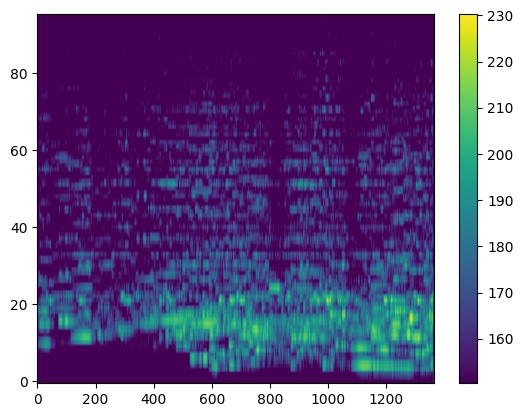

In [102]:
# Plot and save the mel spectrogram
plt.figure()
plt.imshow(spectrogram_db[0], cmap='viridis', aspect='auto', origin='lower')
# plt.hist(torch.flatten(spectrogram), range=[0,1e6])
plt.colorbar()

# Save the spectrogram to an image file
# plt.savefig('mel_spectrogram.png')

# Display the plot
plt.show()